# Load data

In [3]:
# Load xarrays
import xarray as xr

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs = xr.open_dataset(data_dir + '/ds_sat_EOFs.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice = xr.open_dataset(path)
# Remove data with age<11
ds_seaice = ds_seaice.where(ds_seaice.age >= 11000, drop=True)

# load PCs
import numpy as np
# PC_SO_sat1_test_corr = np.load('D:/VScode/Last_deglaciation/data/PC_SO_sat1_test_corr.npy', allow_pickle=True)
PC_SO_sat2_test_corr = np.load('D:/VScode/Last_deglaciation/data/PC_SO_sat2_test_corr.npy', allow_pickle=True)
# PC_SO_sic1_test_corr = np.load('D:/VScode/Last_deglaciation/data/PC_SO_sic1_test_corr.npy', allow_pickle=True)
PC_SO_sic2_test_corr = np.load('D:/VScode/Last_deglaciation/data/PC_SO_sic2_test_corr.npy', allow_pickle=True)


# read the insolation data '65N_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/65N_inso_mean90_-1Ma_0_inter100.txt'
insolation=pd.read_csv(path, sep='\s+', header=None)
# rename columns
insolation.columns=['age', 'insolation']
# age*-1000
insolation['age']=-1*insolation['age']*1000
# filp the dataframe
insolation=insolation.iloc[::-1]





c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


# load Proxy records

In [4]:
import pandas as pd

file_path = 'D:\\VScode\\Last_deglaciation\\data\\NGRIP_d18O_GICC05modelext.txt'
ngrip = pd.read_csv(file_path, skiprows=70, delimiter="\s", header=None, encoding='ISO-8859-1')

# extract the first and third column and rename them to 'age' and 'd18O' respectively
ngrip = ngrip.iloc[:, [0, 2]]
ngrip.columns = ['age', 'd18O']
ngrip=ngrip[['age','d18O']].to_numpy()
ngrip


C:\Users\zps19\AppData\Local\Temp\ipykernel_12284\498970473.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ngrip = pd.read_csv(file_path, skiprows=70, delimiter="\s", header=None, encoding='ISO-8859-1')


array([[ 2.0000e+01, -3.5160e+01],
       [ 4.0000e+01, -3.5820e+01],
       [ 6.0000e+01, -3.5110e+01],
       ...,
       [ 1.2224e+05, -3.2660e+01],
       [ 1.2226e+05, -3.2510e+01],
       [ 1.2228e+05, -3.2560e+01]])

In [5]:
import pandas as pd
import numpy as np

# Read the Excel sheet
file_path = 'D:\\VScode\\Last_deglaciation\\data\\Böhm E etal-2015-Nature-AMOC.xls'
sheet_name = 'Boehm_et_al_,_2014_data'
data = pd.read_excel(file_path, sheet_name=sheet_name)
# Extract the desired columns and convert them to ndarrays
Nd = data[['age [ka]', 'εNd (leachates)']].to_numpy()
Nd = Nd[~np.isnan(Nd).any(axis=1)]
PaTh = data[['age [ka]', '231Pa/230Th']].to_numpy()
PaTh = PaTh[~np.isnan(PaTh).any(axis=1)]

# The first column is age in ka BP, convert it to yr BP
Nd[:, 0] = Nd[:, 0] * 1000
PaTh[:, 0] = PaTh[:, 0] * 1000


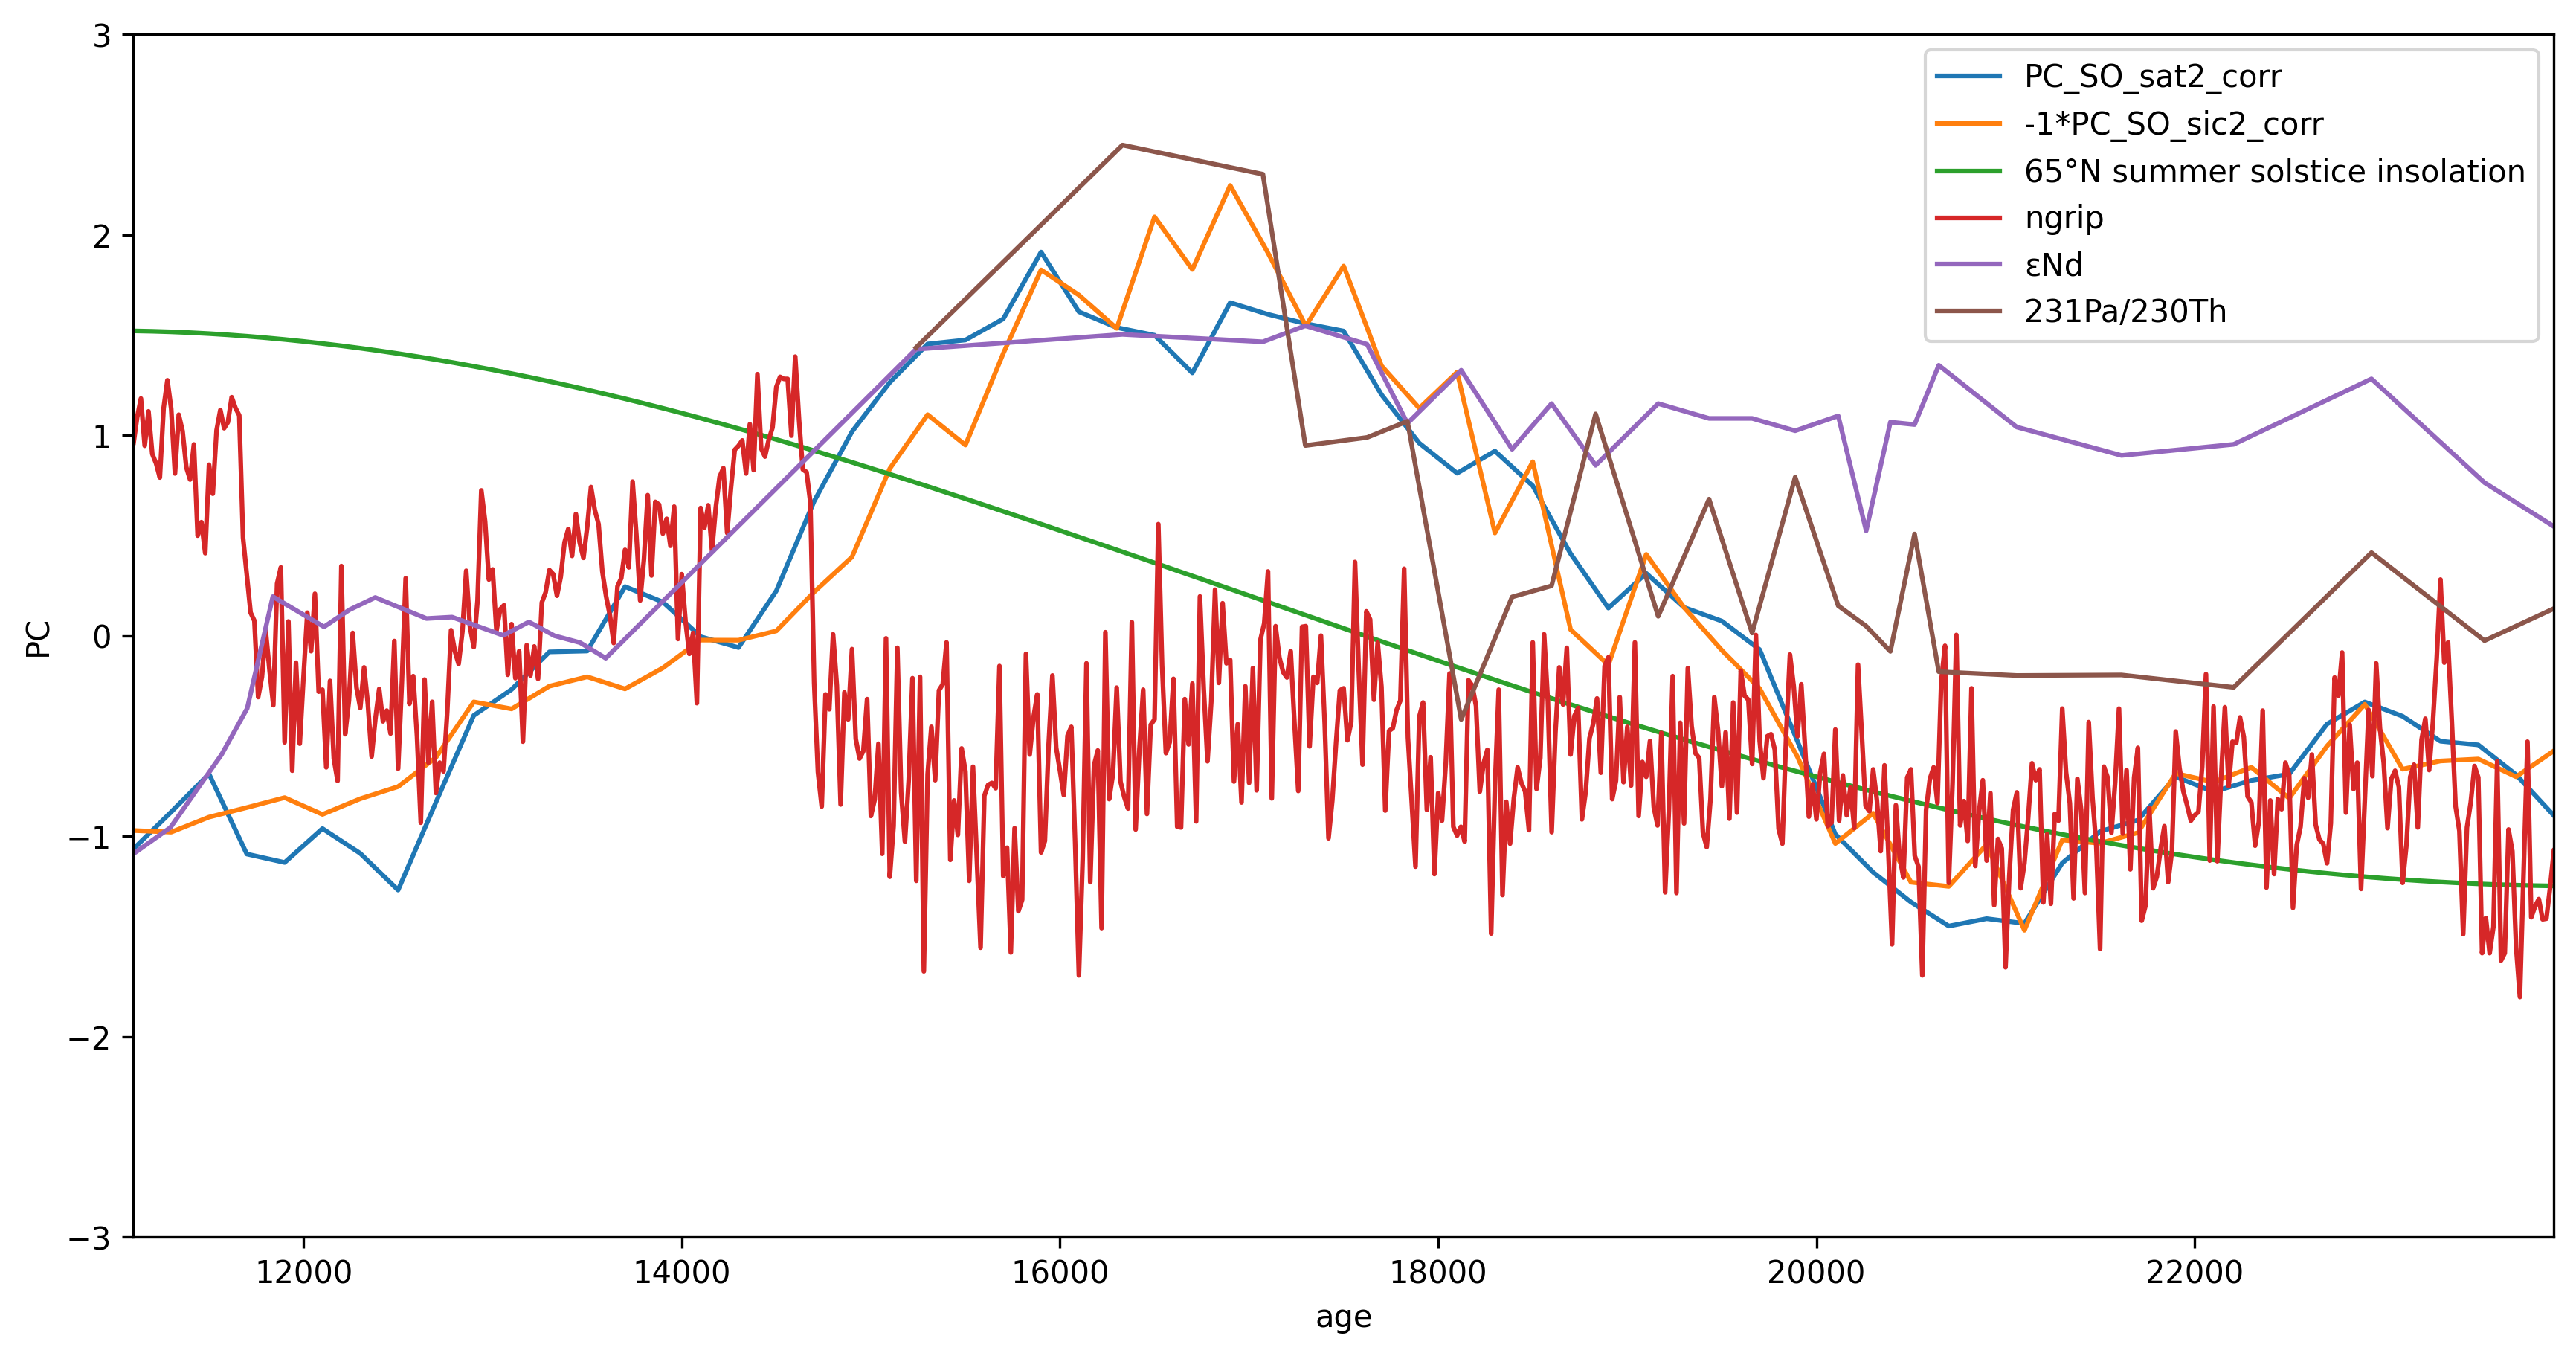

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=300)

# set x and y axis limits
ax.set_xlim(ds_sat_EOFs['age'].values[0], ds_sat_EOFs['age'].values[-1])
ax.set_ylim(-3, 3)

# Existing plots
ax.plot(ds_sat_EOFs['age'], zscore(PC_SO_sat2_test_corr), label='PC_SO_sat2_corr')
ax.plot(ds_seaice['age'], -1*zscore(PC_SO_sic2_test_corr), label='-1*PC_SO_sic2_corr')
ax.plot(insolation['age'], zscore(insolation['insolation']), label='65°N summer solstice insolation')

# Add the standardized ngrip, Nd, and PaTh plots
ax.plot(ngrip[:, 0], zscore(ngrip[:, 1]), label='ngrip')
ax.plot(Nd[:, 0], zscore(Nd[:, 1]), label='εNd')
ax.plot(PaTh[:, 0], zscore(PaTh[:, 1]), label='231Pa/230Th')

# Labels and Legend
ax.set_xlabel('age')
ax.set_ylabel('PC')
ax.legend()

plt.show()
